In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
customerDf=pd.read_csv('C:/Users/wjyjy/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# shape of df
customerDf.shape

(7043, 21)

In [4]:

pd.set_option('display.max_columns',None)

customerDf.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
pd.isnull(customerDf).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
customerDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
for x in customerDf.columns:
    test=customerDf.loc[:,x].value_counts()
    print('The number of rows of {0}：{1}'.format(x,test.sum()))
    print('The type of {0}：{1}'.format(x,customerDf[x].dtypes))
    print('The context of {0}：\n{1}\n'.format(x,test))

The number of rows of customerID：7043
The type of customerID：object
The context of customerID：
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

The number of rows of gender：7043
The type of gender：object
The context of gender：
Male      3555
Female    3488
Name: gender, dtype: int64

The number of rows of SeniorCitizen：7043
The type of SeniorCitizen：int64
The context of SeniorCitizen：
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

The number of rows of Partner：7043
The type of Partner：object
The context of Partner：
No     3641
Yes    3402
Name: Partner, dtype: int64

The number of rows of Dependents：7043
The type of Dependents：object
The context of Dependents：
No     4933
Yes    2110
Name: Dependents, dtype: int64

The number of rows of tenure：7043
The type of tenure：int64
The context of tenure：
1     613
72

- We found 11 users with missing data in the "TotalCharges" column

In [8]:
customerDf['TotalCharges']=customerDf['TotalCharges'].apply(lambda x: np.NaN if str(x).isspace() else x)

In [9]:
customerDf['TotalCharges']=customerDf[['TotalCharges']].astype(float)

In [10]:
pd.isnull(customerDf).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
print(customerDf[customerDf['TotalCharges']!=customerDf['TotalCharges']][['tenure','MonthlyCharges','TotalCharges','Churn']])

      tenure  MonthlyCharges  TotalCharges Churn
488        0           52.55           NaN    No
753        0           20.25           NaN    No
936        0           80.85           NaN    No
1082       0           25.75           NaN    No
1340       0           56.05           NaN    No
3331       0           19.85           NaN    No
3826       0           25.35           NaN    No
4380       0           20.00           NaN    No
5218       0           19.70           NaN    No
6670       0           73.35           NaN    No
6754       0           61.90           NaN    No


- We found that these 11 users have a 'tenure' (length of time on the network) of 0, presumably they are new to the network in the current month. Even if the users lost in the month of registration, they still need to pay the current month's fee. Therefore, we change the length of time these 11 users have been on the network to 1, and fill the total consumption amount with the monthly consumption amount, which is in line with the actual situation

In [12]:
customerDf=customerDf.fillna(method='pad',axis=1)
customerDf['TotalCharges']=customerDf[['TotalCharges']].astype(float)
customerDf['SeniorCitizen']=customerDf[['SeniorCitizen']].astype(int)
customerDf['tenure']=customerDf[['tenure']].astype(int)
customerDf['MonthlyCharges']=customerDf[['MonthlyCharges']].astype(float)

In [13]:
print(customerDf[customerDf['tenure']==0][['tenure','MonthlyCharges','TotalCharges']])

      tenure  MonthlyCharges  TotalCharges
488        0           52.55         52.55
753        0           20.25         20.25
936        0           80.85         80.85
1082       0           25.75         25.75
1340       0           56.05         56.05
3331       0           19.85         19.85
3826       0           25.35         25.35
4380       0           20.00         20.00
5218       0           19.70         19.70
6670       0           73.35         73.35
6754       0           61.90         61.90


- View the number and percentage of churned users

In [52]:
def savePic(name):
    plt.savefig('C:/Users/wjyjy/Downloads/{0}.png'.format(name), dpi=600,bbox_inches='tight')

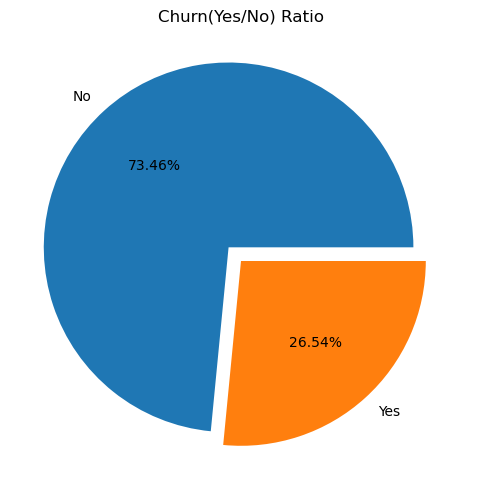

In [16]:
plt.rcParams['figure.figsize']=6,6
plt.pie(customerDf['Churn'].value_counts(),labels=customerDf['Churn'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('Churn(Yes/No) Ratio')
savePic('Churn(Yes or No) Ratio')
plt.show()

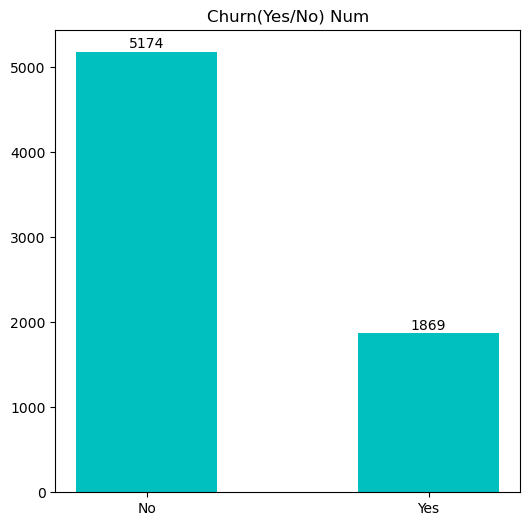

In [17]:
churnDf=customerDf['Churn'].value_counts().to_frame()
x=churnDf.index
y=churnDf['Churn']

plt.bar(x,y,width = 0.5,color = 'c')
plt.title('Churn(Yes/No) Num')
for a,b in zip(x,y):
    plt.text(a,b+10,'%.0f' % b, ha='center', va= 'bottom')
savePic('Churn(Yes or No) Num')
plt.show();

- It is an unbalanced data set, with 26.54% of churned users.

C:\Users\wjyjy\AppData\Local\Temp\ipykernel_36436\82749636.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


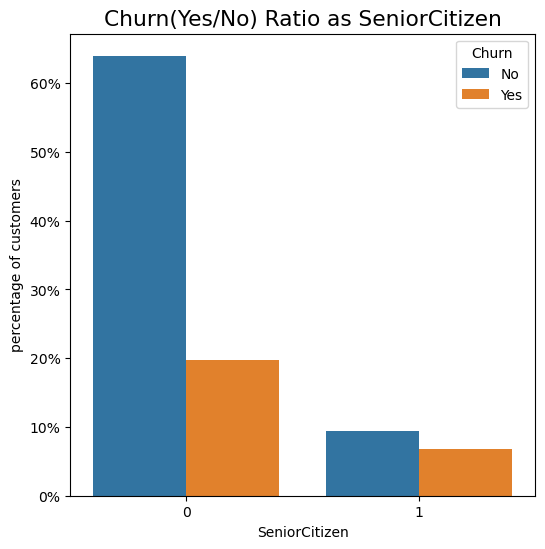

C:\Users\wjyjy\AppData\Local\Temp\ipykernel_36436\82749636.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


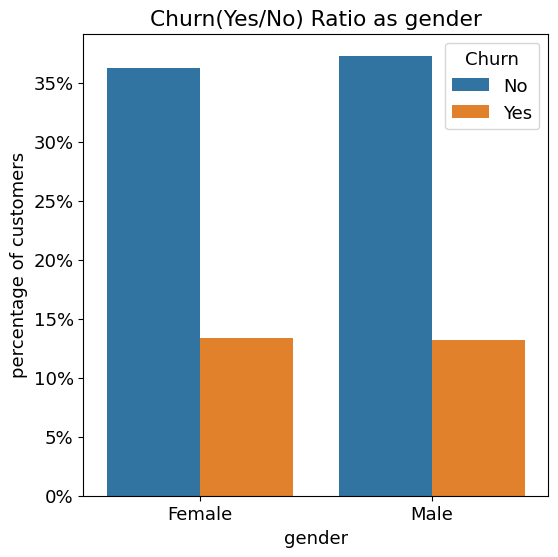

In [18]:
def barplot_percentages(feature,orient='v',axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = (customerDf.groupby(feature)["Churn"].value_counts()/len(customerDf)).to_frame()
    g.rename(columns={"Churn":axis_name},inplace=True)
    g.reset_index(inplace=True)

    #print(g)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        plt.rcParams.update({'font.size': 13})
        #plt.legend(fontsize=10)
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        #plt.legend(fontsize=10)
    plt.title('Churn(Yes/No) Ratio as {0}'.format(feature))
    savePic('Churn(Yes or No) Ratio as {0}'.format(feature))
    plt.show()
barplot_percentages("SeniorCitizen")
barplot_percentages("gender")

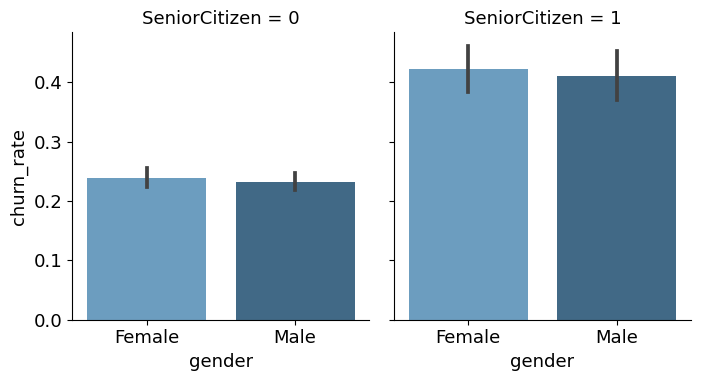

In [19]:
customerDf['churn_rate'] = customerDf['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(customerDf, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])
plt.rcParams.update({'font.size': 13})
savePic('Churn(Yes or No) Ratio as gender and SeniorCitizen')
plt.show()

- User churn is independent of gender; older users account for a significantly higher percentage of churn than younger users.

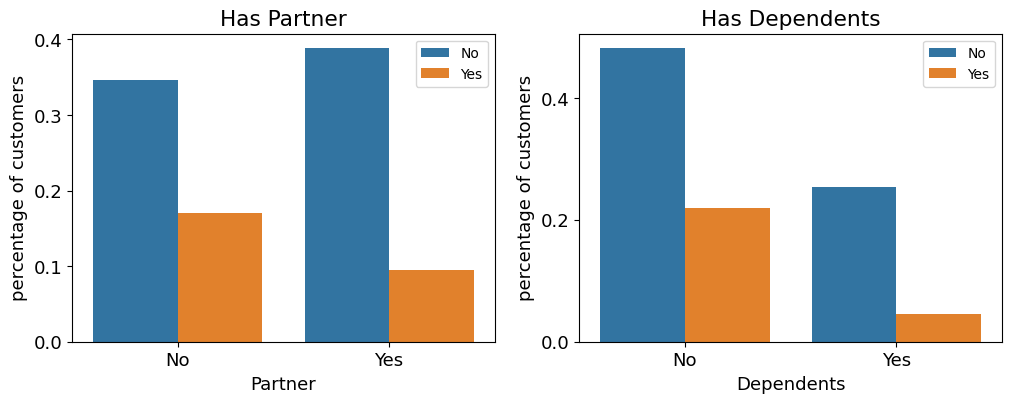

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has Partner")
axis[1].set_title("Has Dependents")
axis_y = "percentage of customers"

# Plot Partner column
gp_partner = (customerDf.groupby('Partner')["Churn"].value_counts()/len(customerDf)).to_frame()
gp_partner.rename(columns={"Churn": axis_y}, inplace=True)
gp_partner.reset_index(inplace=True)
ax1 = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
ax1.legend(fontsize=10)


# Plot Dependents column
gp_dep = (customerDf.groupby('Dependents')["Churn"].value_counts()/len(customerDf)).to_frame()
#print(gp_dep)
gp_dep.rename(columns={"Churn": axis_y} , inplace=True)
#print(gp_dep)
gp_dep.reset_index(inplace=True)
#print(gp_dep)

ax2 = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])



plt.rcParams.update({'font.size': 20})
ax2.legend(fontsize=10)


savePic('Churn(Yes or No) Ratio as partner and dependents')
plt.show()

- The churn rate of users with partners is lower than that of users without partners; the churn rate of users with dependents is lower than that of users without dependents.

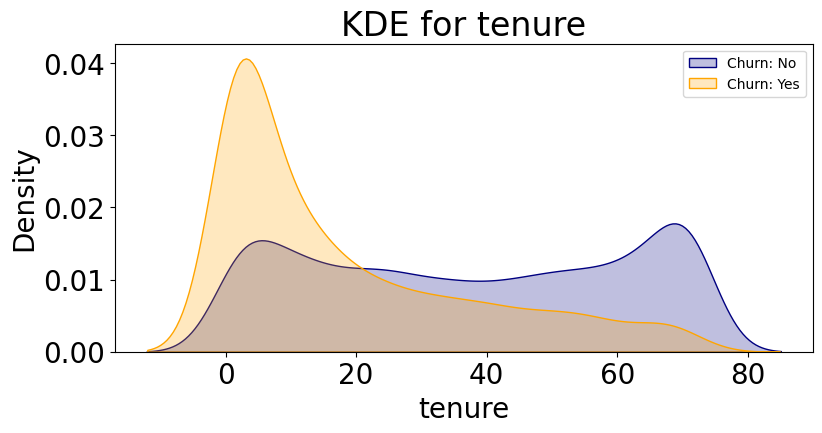

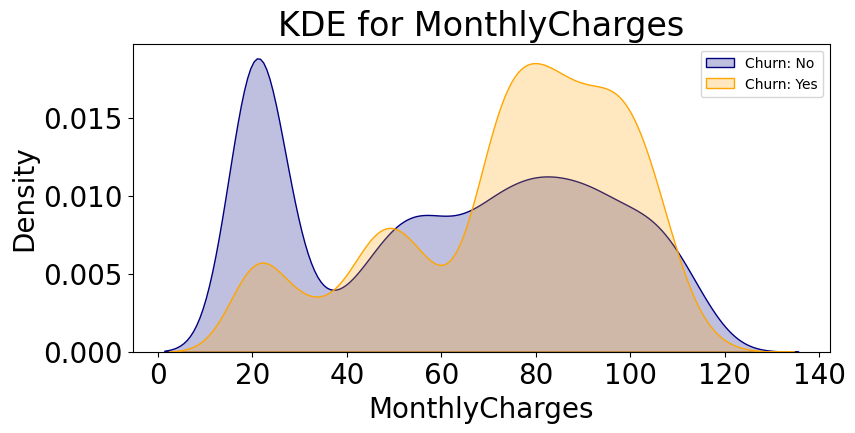

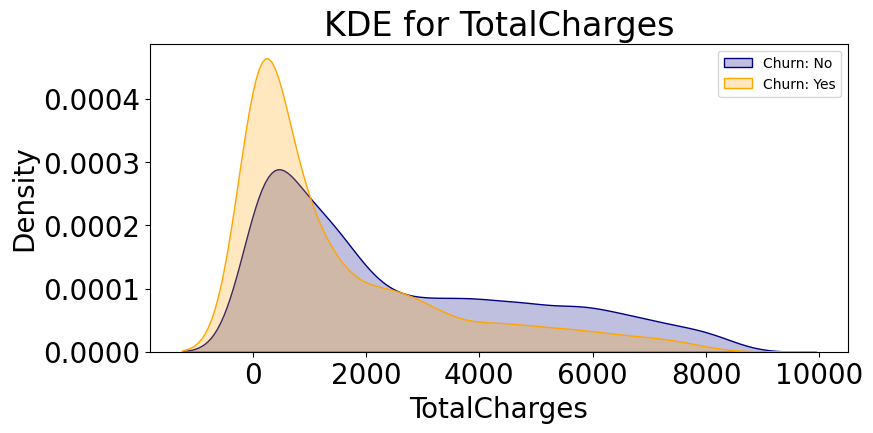

In [21]:
# Kernel density estimaton
def kdeplot(feature,xlabel):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(customerDf[customerDf['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No', shade='True')
    ax1 = sns.kdeplot(customerDf[customerDf['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes',shade='True')
    plt.xlabel(xlabel)
    plt.rcParams.update({'font.size': 20})
    plt.legend(fontsize=10)
kdeplot('tenure','tenure')
savePic('Churn(Yes or No) Ratio as tenure kde')
kdeplot('MonthlyCharges','MonthlyCharges')
savePic('Churn(Yes or No) Ratio as MonthlyCharges kde')
kdeplot('TotalCharges','TotalCharges')
savePic('Churn(Yes or No) Ratio as TotalCharges kde')
plt.show();

C:\Users\wjyjy\AppData\Local\Temp\ipykernel_36436\82749636.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


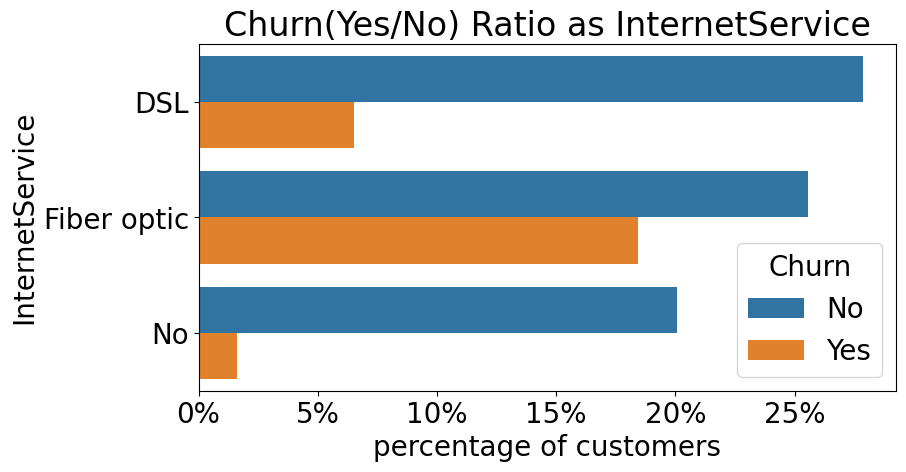

In [24]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h");

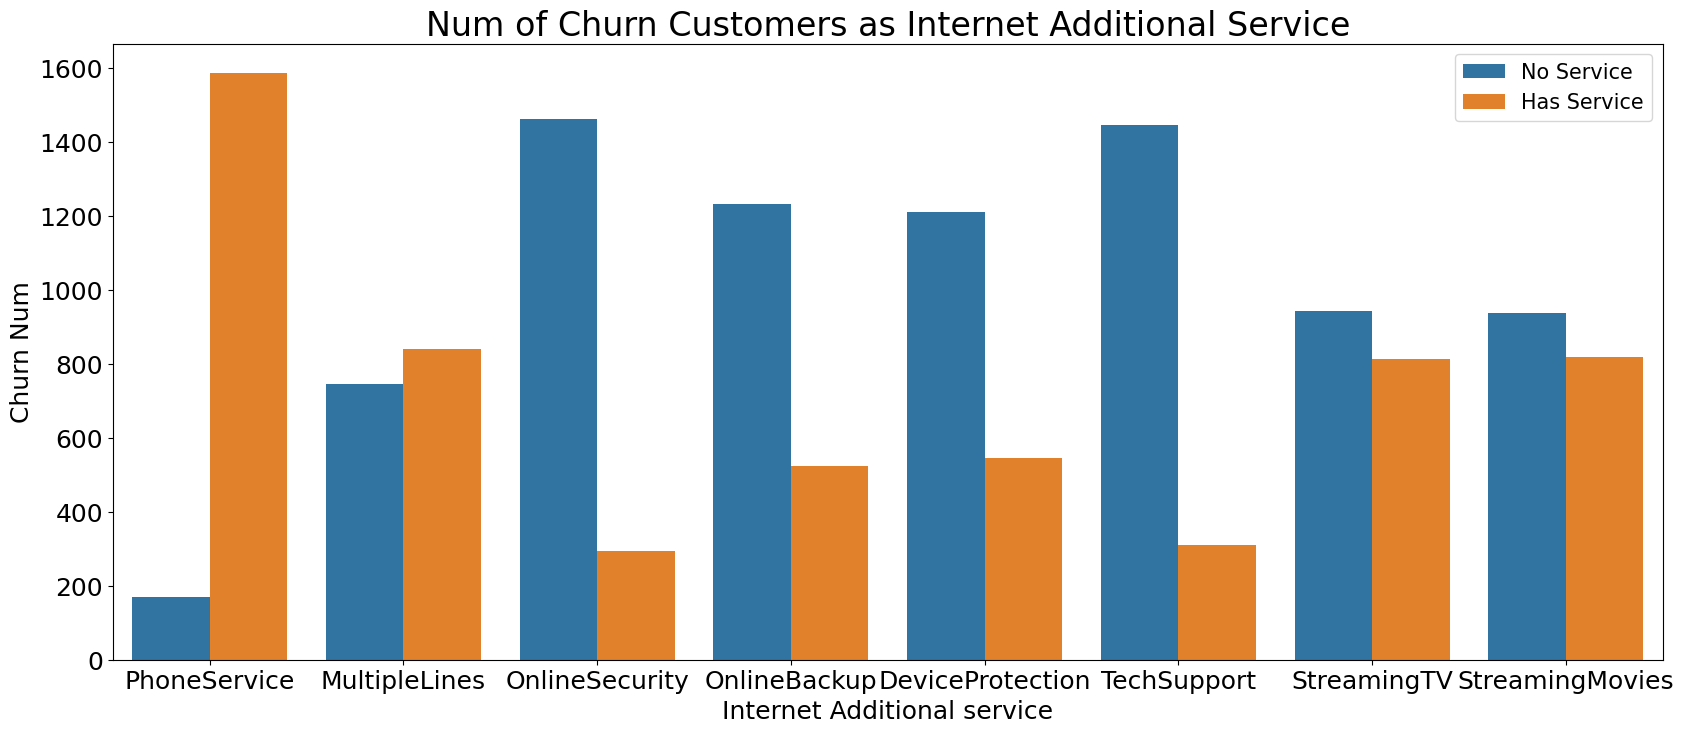

In [50]:
plt.figure(figsize=(20, 8))
df1 = customerDf[(customerDf.InternetService != "No") & (customerDf.Churn == "Yes")]
df1 = pd.melt(df1[cols])
df1.rename(columns={'value': 'Has service'}, inplace=True)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Internet Additional service', ylabel='Churn Num')
plt.rcParams.update({'font.size':20})
plt.legend( labels = ['No Service', 'Has Service'],fontsize=15)
plt.title('Num of Churn Customers as Internet Additional Service')
savePic('Churn Num as Internet Additional Service')
plt.show()

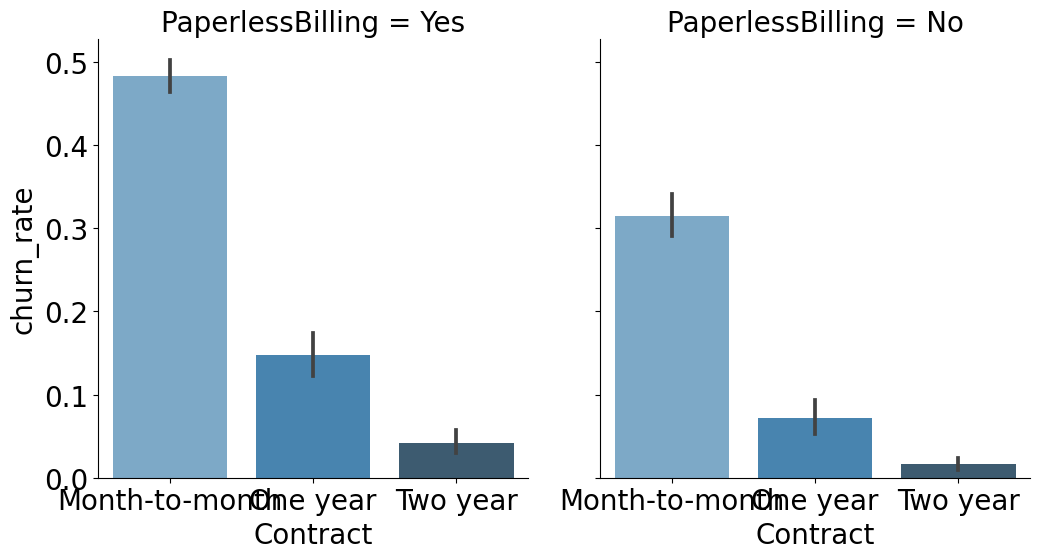

In [51]:
g = sns.FacetGrid(customerDf, col="PaperlessBilling", height=6, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])
plt.rcParams.update({'font.size':18})
savePic('Churn Ratio as PaperlessBilling')
plt.show()

C:\Users\wjyjy\AppData\Local\Temp\ipykernel_36436\82749636.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


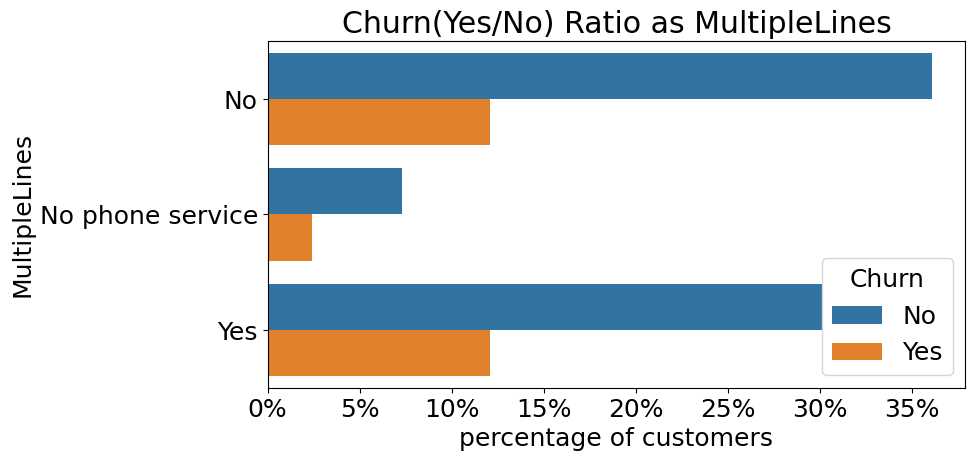

In [49]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

C:\Users\wjyjy\AppData\Local\Temp\ipykernel_36436\82749636.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


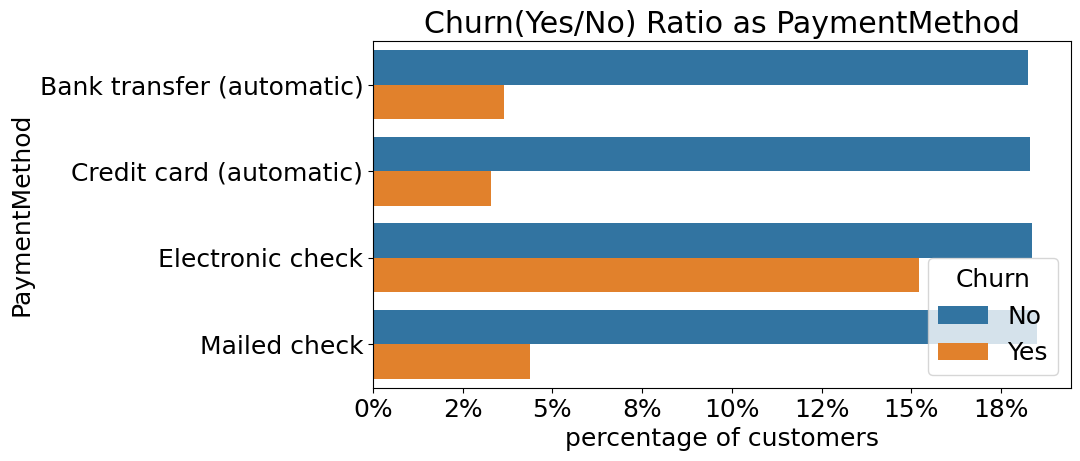

In [52]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod",orient='h')

In [14]:
customerDf = customerDf.drop(['customerID'], axis=1)

In [15]:
customerDf = customerDf.drop(['gender'], axis=1)

In [16]:
customerDf = customerDf.drop(['PhoneService'], axis=1)

In [19]:
customerDf.loc[:,'OnlineSecurity'].replace(to_replace='No internet service',value='No',inplace=True)

In [21]:
customerDf.loc[:,'OnlineBackup'].replace(to_replace='No internet service',value='No',inplace=True)

In [23]:
customerDf.loc[:,'DeviceProtection'].replace(to_replace='No internet service',value='No',inplace=True)

In [26]:
customerDf.loc[:,'TechSupport'].replace(to_replace='No internet service',value='No',inplace=True)

In [25]:
customerDf.loc[:,'StreamingMovies'].replace(to_replace='No internet service',value='No',inplace=True)

## SPLIT

In [27]:
for x in customerDf.columns:
    test=customerDf.loc[:,x].value_counts()
    print('The number of rows of {0}：{1}'.format(x,test.sum()))
    print('The type of {0}：{1}'.format(x,customerDf[x].dtypes))
    print('The context of {0}：\n{1}\n'.format(x,test))

The number of rows of SeniorCitizen：7043
The type of SeniorCitizen：int32
The context of SeniorCitizen：
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

The number of rows of Partner：7043
The type of Partner：object
The context of Partner：
No     3641
Yes    3402
Name: Partner, dtype: int64

The number of rows of Dependents：7043
The type of Dependents：object
The context of Dependents：
No     4933
Yes    2110
Name: Dependents, dtype: int64

The number of rows of tenure：7043
The type of tenure：int32
The context of tenure：
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

The number of rows of MultipleLines：7043
The type of MultipleLines：object
The context of MultipleLines：
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

The number of rows of InternetService：7043
The type of InternetService：object
The context of InternetServi

In [28]:
customerDf.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
customerDf.shape

(7043, 18)

In [39]:
#split data
X = customerDf.loc[:, customerDf.columns != 'Churn']
y = customerDf['Churn']
random_state = 39
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.6,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size =0.5, random_state=random_state)

## PREPROCCESS

- Looking at the data types, we find that except for "tenure", "MonthlyCharges", and "TotalCharges", which are continuous features, all the others are category features. For continuous features, standardscaler is better to use. For category features, one-hot encoding is used;

In [40]:
std_ftrs = ['tenure', 'MonthlyCharges', 'TotalCharges']
onehot_ftrs = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
preprocessor = ColumnTransformer(
transformers=[('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'),onehot_ftrs),('std', StandardScaler(), std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)
df_train = pd.DataFrame(X_train_prep, columns=preprocessor.get_feature_names_out())[:len(X_train_prep)]
df_train.head()

,onehot__SeniorCitizen_0,onehot__SeniorCitizen_1,onehot__Partner_No,onehot__Partner_Yes,onehot__Dependents_No,onehot__Dependents_Yes,onehot__MultipleLines_No,onehot__MultipleLines_No phone service,onehot__MultipleLines_Yes,onehot__InternetService_DSL,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__OnlineSecurity_No,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_No,onehot__OnlineBackup_Yes,onehot__DeviceProtection_No,onehot__DeviceProtection_Yes,onehot__TechSupport_No,onehot__TechSupport_Yes,onehot__StreamingTV_No,onehot__StreamingTV_Yes,onehot__StreamingMovies_No,onehot__StreamingMovies_Yes,onehot__Contract_Month-to-month,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_No,onehot__PaperlessBilling_Yes,onehot__PaymentMethod_Bank transfer (automatic),onehot__PaymentMethod_Credit card (automatic),onehot__PaymentMethod_Electronic check,onehot__PaymentMethod_Mailed check,std__tenure,std__MonthlyCharges,std__TotalCharges
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.080067,-0.303131,-0.852637
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.161104,-1.511791,-0.982727
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.282661,-1.508466,-1.004289
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.229512,1.078433,1.730148
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.593840,0.830716,-0.342893


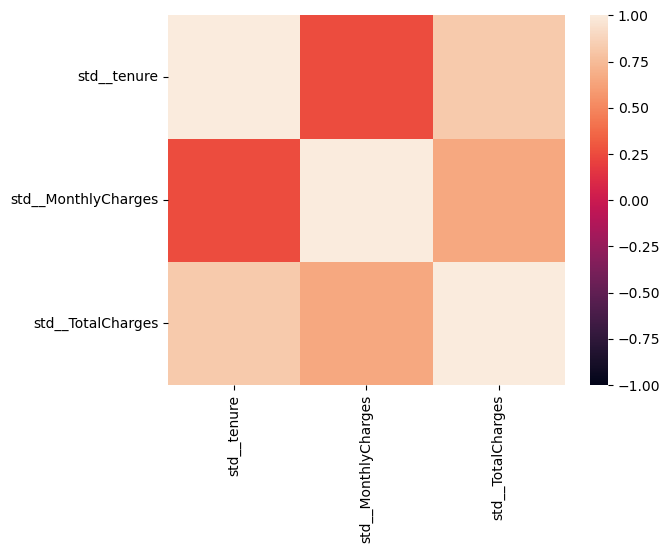

In [53]:
sns.heatmap(x.corr(),
vmin=-1,
vmax=1)
savePic('heatmap')